# Assignment-1 ( Shreyas Kambla 001401937)



# New York City Taxi Trip Duration 



## Abstract:

* Predicting a trip duration isn’t something new. With the use of Google maps API one can find the estimated time it would take to move between two points in the city.

* Objective of this project is to do a detailed analysis of the factors affecting a trip between two points in a city come up with model with accurate and robust prediction.

* Prediction model should give in-depth analysis of the factors associated with the New York City taxi trips.

## Target Customers:

* Data can be used by taxi vendors for better services to the users UBER/LYFT 


## Various factors

* A city like New York is expected to have various factors and variations with respect to the trip durations here are feature from the data set 


+ id - a unique identifier for each trip
+ vendor_id - a code indicating the provider associated with the trip record
+ pickup_datetime - date and time when the meter was engaged
+ dropoff_datetime - date and time when the meter was disengaged
+ passenger_count - the number of passengers in the vehicle (driver entered value)
+ pickup_longitude - the longitude where the meter was engaged
+ pickup_latitude - the latitude where the meter was engaged
+ dropoff_longitude - the longitude where the meter was disengaged
+ dropoff_latitude - the latitude where the meter was disengaged
+ store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
+ trip_duration - duration of the trip in seconds


## File descriptions:

+ train.csv - the training set (contains 1458644 trip records)
+ test.csv - the testing set (contains 625134 trip records)


## Result:

* RMSLE of 0.439 was achieved for test data 


## Link:

https://www.kaggle.com/c/nyc-taxi-trip-duration/data



## Disclaimer: 

* The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels.

## Approved by TA:

https://docs.google.com/spreadsheets/d/1qf0Ln_E3OqLG9F8YcZHp564_CYarVVV4Nmu_y5wuF48/edit#gid=0

# Step1:  Loading the data from CSV to data frame

In [204]:
#Converting  New york trip  csv to dataframe and numpy for mathmatical operation

import pandas as pd
import numpy as np

# Graphical representation of the features

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import shap
import plotly.graph_objs as go

# Ignore the warning 

import warnings
warnings.filterwarnings('ignore')

In [205]:
''' 
Converting csv file into dataframe (Train and test data is already split)
Loading train data set only 
'''
my_path = %pwd
print(my_path)
df_train = pd.read_csv(f'{my_path}/train.csv')
print (df_train.shape)
df_train.head(13)

/Users/shruthiarun/Desktop/shreyasassginment/Spring2020/advance_data_science/assignment-1
(1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


# Step 2: Checking for Null Values and Understand the geography of the variables 

In [206]:
# Check if there is empty value - CLEAN DATA There is no need to fill up null values

null_vals = df_train.isnull().sum()/len(df_train)*100
print (null_vals)
null_vals = pd.DataFrame(null_vals)

id                    0.0
vendor_id             0.0
pickup_datetime       0.0
dropoff_datetime      0.0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag    0.0
trip_duration         0.0
dtype: float64


# Step 3: Understand the data and its data type 

In [207]:
'''
Describe the data 

1. vendor_id - has only two values 1 and 2 (like uber and lyft )
2. passenger_count - Ranges from 0 - 9 
3. pickup_longitude - 25% - 75 % are near to -73.9 longitude 
4. pickup_latitude - 25% - 75 % are near to -40.7 latitude
5. dropoff_longitude -  25% - 75 % are near to -73.9 longitude 
6. dropoff_latitude - 25% - 75 % are near to -40.7 latitude
7. trip_duration - trip duration are varied minimum is 1 sec and max is 3526282 - NEED TO REMOVE NOISE 
'''

df_train.describe()



,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [208]:
'''
Understand the data 
1. Check if the ID is unique 
2. Check what values did store_and_fwd_flag contain

'''

if df_train.id.nunique() == df_train.shape[0]:
    print("Train ids are unique")
    
print('The store_and_fwd_flag has only two values {}.'.format(str(set(df_train.store_and_fwd_flag.unique()) | set(df_train.store_and_fwd_flag.unique()))))




Train ids are unique
The store_and_fwd_flag has only two values {'Y', 'N'}.


In [209]:
# Get the data type information about the columns

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [212]:
# Based on the Google maps newyork lat and long - visualization is frame is created  

west, south, east, north = -74.03, 40.63, -73.77, 40.85
df_train_display=df_train.copy()
df_train_display = df_train_display[(df_train_display.pickup_latitude> south) & (df_train_display.pickup_latitude < north)]
df_train_display = df_train_display[(df_train_display.dropoff_latitude> south) & (df_train_display.dropoff_latitude < north)]
df_train_display = df_train_display[(df_train_display.pickup_longitude> west) & (df_train_display.pickup_longitude < east)]
df_train_display = df_train_display[(df_train_display.dropoff_longitude> west) & (df_train_display.dropoff_longitude < east)]

# Step 4: Visualize the data for better insight 

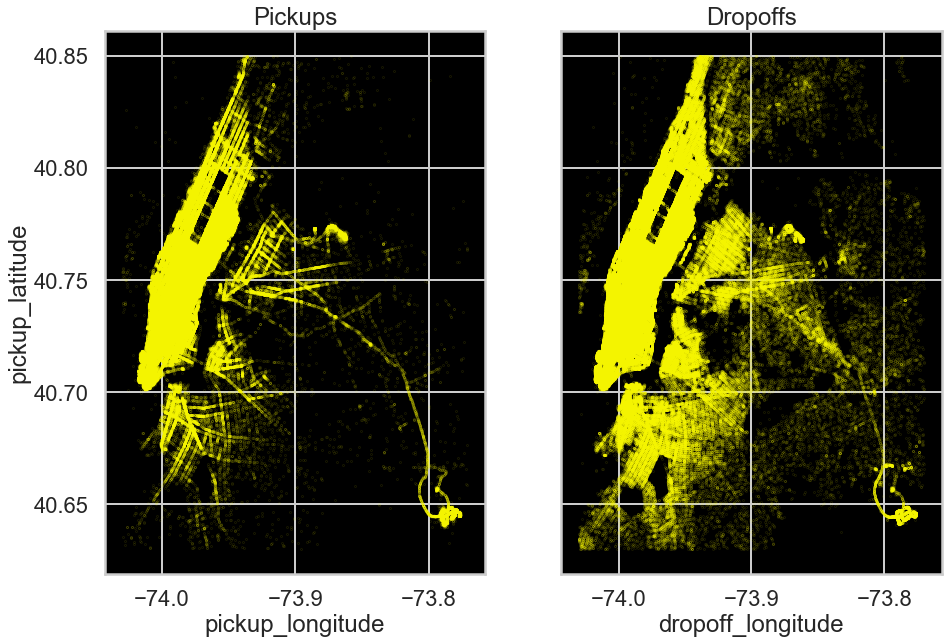

In [213]:
# Find the new york pick up points and drop off points lat and long 

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

df_train_display.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='yellow', 
                s=.02, alpha=0.6, subplots=True, ax=ax1)
ax1.set_title("Pickups")
ax1.set_facecolor('black')

df_train_display.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoffs")
ax2.set_facecolor('black')

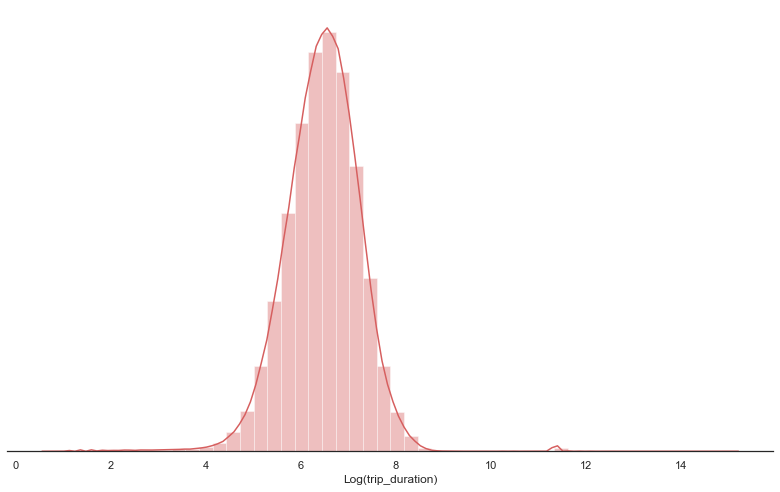

In [214]:
# distribution plot of the trip duration

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(df_train_display['trip_duration'].values+1), axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

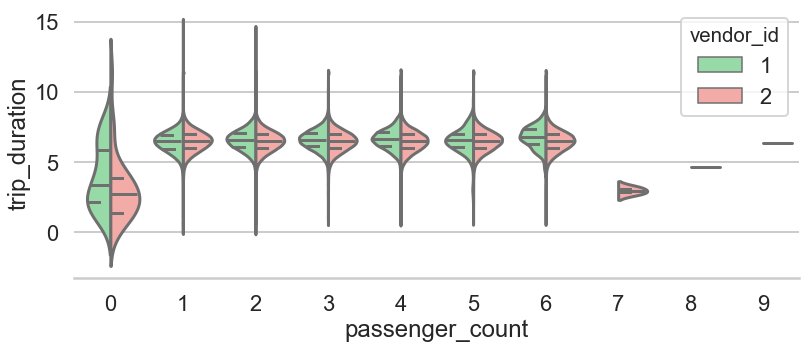

In [215]:
# Trip duration with respect to vendor and passenger count

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_context("poster")
df_train2 = df_train.copy()
df_train2['trip_duration']= np.log(df_train['trip_duration'])

plt.figure(figsize=(13,5))
sns.violinplot(x="passenger_count", y="trip_duration", hue="vendor_id", data=df_train2, split=True,
               inner="quart",palette={1: "g", 2: "r"})

sns.despine(left=True)


# Step 5: Extract the feature from the data set

In [285]:
'''
Extracting new feature from the given data set 

1. Distance - By using haversine ( using longitude and latitude calculate the distance between pickup and drop location)
Use - https://pypi.org/project/haversine/
2. Converting Pickup time 
               - Month of the pick up (1-12)(Jan-Dec)
               - day of the pick up (0-6)(Monday-Sunday)
               - Weekend or not (0-1)
               - time of pickup in seconds (0 - 86400) (12 Am midnight to 11.59 PM )
3. Using K means clustering the location based on longitude and latitude 

'''
import haversine

df_train_new=df_train.copy()

df_train_new['distance'] = df_train_new.apply(lambda r: haversine.haversine((r['pickup_latitude'],r['pickup_longitude']),(r['dropoff_latitude'], r['dropoff_longitude'])), axis=1)



df_train_new["pickup_datetime"]= pd.to_datetime(df_train_new["pickup_datetime"]) 
df_train_new['pickup_month'] = df_train_new['pickup_datetime'].dt.month
df_train_new['pickup_day_of_week'] = df_train_new['pickup_datetime'].dt.weekday
df_train_new['pickup_weekend'] = np.where((df_train_new['pickup_datetime'].dt.dayofweek) < 5,0,1)

df_train_new['pickup_time'] = (df_train_new['pickup_datetime']- df_train_new['pickup_datetime'].dt.floor('D')).dt.total_seconds()


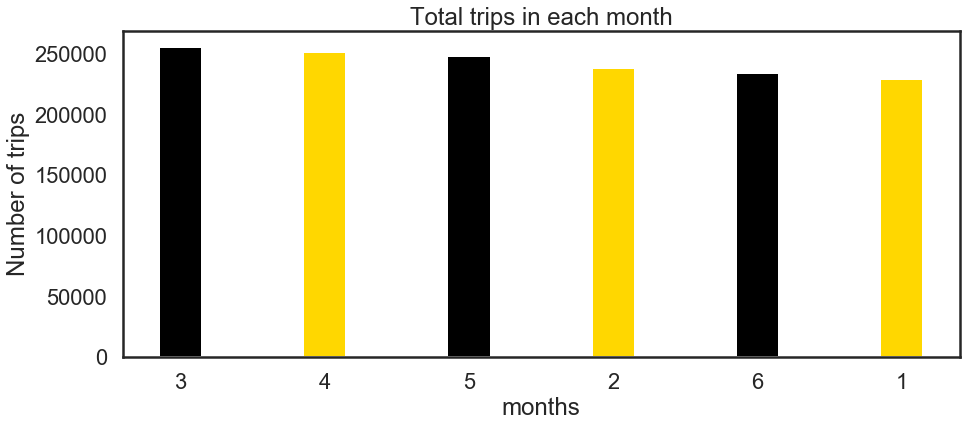

In [286]:
# Trip duration with respect to months

plt.figure(figsize=(15, 6)) 
df_train_new.pickup_month.value_counts().plot(kind='bar',color=["black","gold"],align='center',width=0.3)
plt.xticks(rotation='horizontal')
plt.xlabel("months")
plt.ylabel("Number of trips")
plt.title("Total trips in each month");

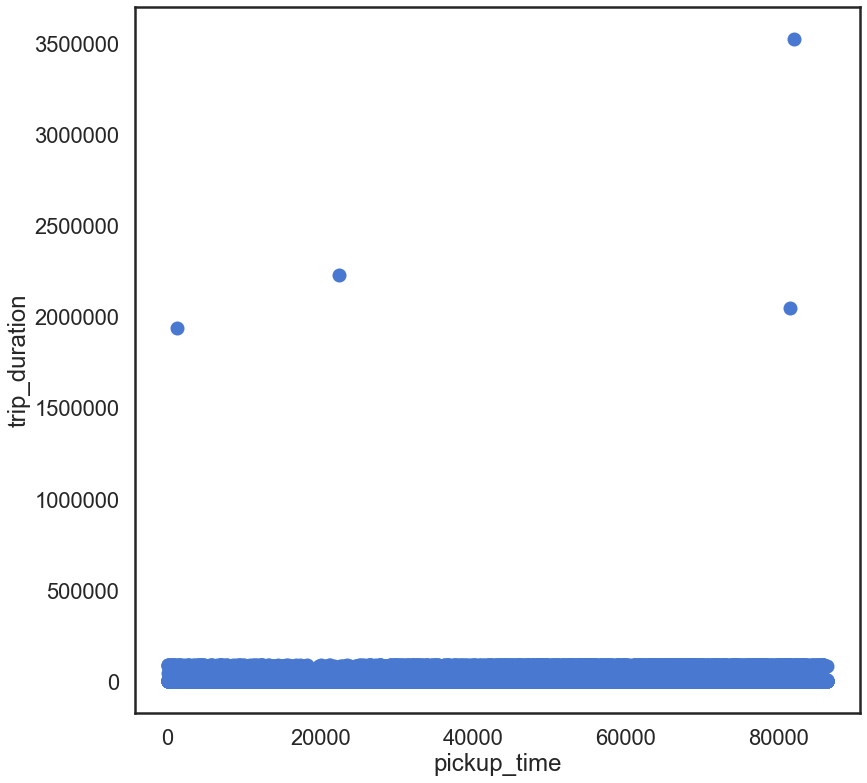

In [287]:
# Trip duration from midnight to end of the day 

plt.figure(figsize=(13,13))
plt.scatter(df_train_new['pickup_time'], df_train_new['trip_duration'])
plt.xlabel('pickup_time')
plt.ylabel('trip_duration')
plt.show()

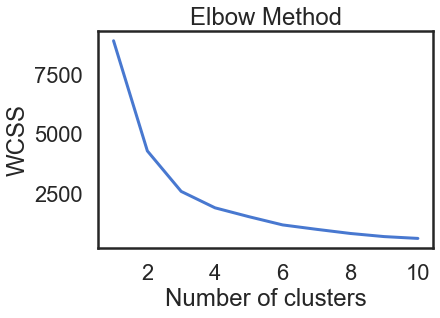

In [288]:
# Calculating optimum K means value
# https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

from sklearn.cluster import KMeans

wcss = []
df_train_new_pick = df_train_new[['pickup_longitude','pickup_latitude']]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_train_new_pick)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [289]:
# based on the elbow curve creating the pick and drop of clusters 

kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_train_new_pick = df_train_new[['pickup_longitude','pickup_latitude']]
df_train_new_dropoff = df_train_new[['dropoff_longitude','dropoff_latitude']]
kmeans.fit(df_train_new_pick)
cluster = kmeans.labels_
df_train_new['pickup_cluster'] = cluster.tolist()
df_train_new['dropoff_cluster'] = kmeans.predict(df_train_new_dropoff)

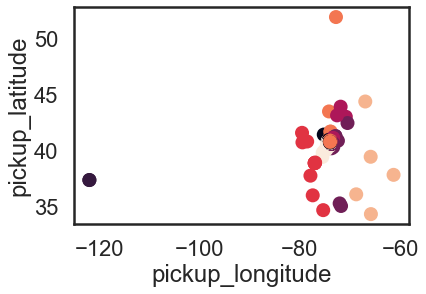

In [290]:
# Visualising the pickup cluster 

import matplotlib
plt.scatter(df_train_new['pickup_longitude'], df_train_new['pickup_latitude'],c=cluster)
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.show()

In [291]:
df_train_new

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_month,pickup_day_of_week,pickup_weekend,pickup_time,pickup_cluster,dropoff_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,3,0,0,62695.0,0,5
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,6,6,1,2615.0,0,7
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107,1,1,0,41724.0,0,7
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500,4,2,0,70351.0,7,7
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,3,5,1,48655.0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.225082,4,4,0,48664.0,0,7
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.049844,1,6,1,27315.0,0,5
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7.824617,4,4,0,25061.0,5,7
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.092565,1,1,0,57386.0,0,0


# Step 6: Dropping unwanted Columns/rows and converting object data type int/float

In [292]:
'''
Drop the unwanted tables to train the data 

1. Id is unique droping because index already is integer
2. dropoff time is same as time duration 
3. pick time is split into day time and month
4. Converting store and forward into integer data type

'''

df_train_new.drop("id",axis = 1,inplace=True)
df_train_new.drop("pickup_datetime",axis = 1,inplace=True)
df_train_new.drop("dropoff_datetime",axis = 1,inplace=True)


df_train_new.store_and_fwd_flag[df_train_new.store_and_fwd_flag == 'N'] = 0
df_train_new.store_and_fwd_flag[df_train_new.store_and_fwd_flag == 'Y'] = 1
df_train_new['store_and_fwd_flag_int']=df_train_new['store_and_fwd_flag'].astype('int')
df_train_new.drop("store_and_fwd_flag",axis = 1,inplace=True)

In [293]:
'''
All the fields are converted to int/float data type
'''
df_train_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 15 columns):
vendor_id                 1458644 non-null int64
passenger_count           1458644 non-null int64
pickup_longitude          1458644 non-null float64
pickup_latitude           1458644 non-null float64
dropoff_longitude         1458644 non-null float64
dropoff_latitude          1458644 non-null float64
trip_duration             1458644 non-null int64
distance                  1458644 non-null float64
pickup_month              1458644 non-null int64
pickup_day_of_week        1458644 non-null int64
pickup_weekend            1458644 non-null int64
pickup_time               1458644 non-null float64
pickup_cluster            1458644 non-null int64
dropoff_cluster           1458644 non-null int32
store_and_fwd_flag_int    1458644 non-null int64
dtypes: float64(6), int32(1), int64(8)
memory usage: 161.4 MB


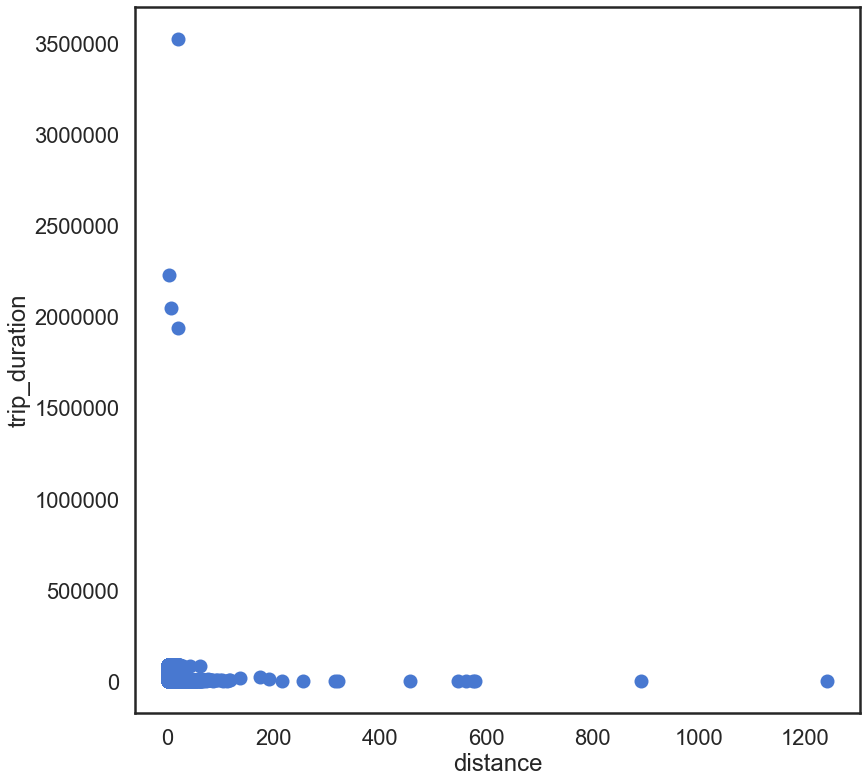

In [294]:
# Remove unwanted row enteries - outliers which impact the predicition

plt.figure(figsize=(13,13))
plt.scatter(df_train_new['distance'], df_train_new['trip_duration'])
plt.xlabel('distance')
plt.ylabel('trip_duration')
plt.show()

In [295]:
# Removing unwanted rows
df_train_new2 =df_train_new[(df_train_new.trip_duration<20000) & (df_train_new.distance<=200)]

In [296]:
# As you can see percentage lost is almost zero or 0.15 % 
percentagelost = (df_train_new.shape[0]-df_train_new2.shape[0])*100/df_train_new.shape[0]
print(percentagelost)

0.14252963711501915


In [297]:
df_train_new2

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,pickup_month,pickup_day_of_week,pickup_weekend,pickup_time,pickup_cluster,dropoff_cluster,store_and_fwd_flag_int
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,1.498523,3,0,0,62695.0,0,5,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,1.805510,6,6,1,2615.0,0,7,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,6.385107,1,1,0,41724.0,0,7,0
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,1.485500,4,2,0,70351.0,7,7,0
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,1.188590,3,5,1,48655.0,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,778,1.225082,4,4,0,48664.0,0,7,0
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,655,6.049844,1,6,1,27315.0,0,5,0
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,764,7.824617,4,4,0,25061.0,5,7,0
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,373,1.092565,1,1,0,57386.0,0,0,0


# Step 7: Finding relationship/co-linearity using stats tools


##  Is the relationship significant ?

In [298]:
'''
Assumption of any relationship can be determined by null hypthosesis test

when the slope $\beta_1 = 0$ we have no relationship between the outcome and predictors.

In this cases Y is th predictor which is trip duration and X is other parameters

To determine how big the difference between $\hat{\beta}_1$ (the "true" $\beta_1$) and $\beta_1$ must be before
we would reject the null hypothesis, we calculate the probability of obtaining a value of $\beta_1$ as large as we
have calculated if the null hypothesis were true. This probability is known as the P-value.

general we consider the significance level or threshold as alpha = 0.05 
if any parameter has more p value more than 0.05 then it determines that there is no relationship between
them and trip duration 
'''
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_train_new3=df_train_new2.copy()
#X = df_train_new3.drop(["trip_duration","vendor_id","pickup_latitude","dropoff_latitude","dropoff_longitude"],axis = 1)
X = df_train_new3.drop(["trip_duration"],axis = 1)
Y = df_train_new3[["trip_duration"]]
model_OLS = sm.OLS(Y, X)
OLS_result = model_OLS.fit()
OLS_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          trip_duration   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                          5.722e+05
Date:                Sat, 25 Jan 2020   Prob (F-statistic):                        0.00
Time:                        09:01:39   Log-Likelihood:                     -1.0860e+07
No. Observations:             1456565   AIC:                                  2.172e+07
Df Residuals:                 1456551   BIC:                                  2.172e+07
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
vendor_id                  0.1050      0.728      0.144      0.885      -1.323       1.533
passenger_count            4.0732      0.276     14.765      0.000       3.532       4.614
pickup_longitude         140.1256      8.264     16.957      0.000     123.929     156.322
pickup_latitude         1241.4393     12.113    102.489      0.000    1217.698    1265.180
dropoff_longitude       -385.4756      7.979    -48.313      0.000    -401.114    -369.837
dropoff_latitude       -1679.5519     11.197   -149.994      0.000   -1701.499   -1657.605
distance                 130.0501      0.090   1446.024      0.000     129.874     130.226
pickup_month              18.2193      0.206     88.263      0.000      17.815      18.624
pickup_day_of_week        14.9398      0.285     52.390      0.000      14.381      15.499
pickup_weekend          -147.7017      1.235   -119.621      0.000    -150.122    -145.282
pickup_time                0.0011   1.52e-05     75.033      0.000       0.001       0.001
pickup_cluster             1.7094      0.119     14.372      0.000       1.476       1.943
dropoff_cluster          -12.2320      0.121   -101.250      0.000     -12.469     -11.995
store_and_fwd_flag_int    42.0241      4.698      8.945      0.000      32.817      51.232
==============================================================================
Omnibus:                  1011127.018   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        137303675.349
Skew:                           2.459   Prob(JB):                         0.00
Kurtosis:                      50.309   Cond. No.                     2.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [299]:
'''
Dropping the vendor ID ( Null hypthosesis is proven) p value is > 0.05 
'''

df_train_new3.drop(["vendor_id"],axis = 1,inplace=True)

# Is there any multi-collinearity in the model?

In [300]:
'''
To determine multi collineratity we do VIF test 

A variance inflation factor(VIF) detects multicollinearity in regression analysis.
Multicollinearity is when there’s correlation between predictors (i.e. independent variables)
in a model; it’s presence can adversely affect your regression results.

1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.
'''
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_train_new3.values, i) for i in range(df_train_new3.shape[1])]
vif["features"] = df_train_new3.columns
vif.round(1)

,VIF Factor,features
0,2.6,passenger_count
1,3105816.6,pickup_longitude
2,2039411.9,pickup_latitude
3,2899427.7,dropoff_longitude
4,1757117.3,dropoff_latitude
5,6.5,trip_duration
6,4.5,distance
7,5.4,pickup_month
8,8.9,pickup_day_of_week
9,3.6,pickup_weekend


In [302]:
'''
Dropping  VIF factor which is greater than 5 

Note I kept 3 of lat/long but stil VIF score of pick lat was 18 hence i removed all the 4 features

'''
df_train_new4=df_train_new3.copy()
df_train_new4.drop(["dropoff_longitude","dropoff_latitude","pickup_longitude","pickup_latitude","pickup_day_of_week"],axis = 1,inplace=True)
df_train_new4

,passenger_count,trip_duration,distance,pickup_month,pickup_weekend,pickup_time,pickup_cluster,dropoff_cluster,store_and_fwd_flag_int
0,1,455,1.498523,3,0,62695.0,0,5,0
1,1,663,1.805510,6,1,2615.0,0,7,0
2,1,2124,6.385107,1,0,41724.0,0,7,0
3,1,429,1.485500,4,0,70351.0,7,7,0
4,1,435,1.188590,3,1,48655.0,5,5,0
...,...,...,...,...,...,...,...,...,...
1458639,4,778,1.225082,4,0,48664.0,0,7,0
1458640,1,655,6.049844,1,1,27315.0,0,5,0
1458641,1,764,7.824617,4,0,25061.0,5,7,0
1458642,1,373,1.092565,1,0,57386.0,0,0,0


# In the multivariate models are predictor variables independent of all the other predictor variables?

In [303]:
'''
By the VIF result we can predict that all these variables are not collinear and independent of 
each other .

Note Trip duration is target variable it cant be removed 
'''
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_train_new4.values, i) for i in range(df_train_new4.shape[1])]
vif["features"] = df_train_new4.columns
vif.round(1)

,VIF Factor,features
0,2.4,passenger_count
1,6.1,trip_duration
2,4.3,distance
3,4.0,pickup_month
4,1.4,pickup_weekend
5,4.0,pickup_time
6,2.1,pickup_cluster
7,2.3,dropoff_cluster
8,1.0,store_and_fwd_flag_int


## In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

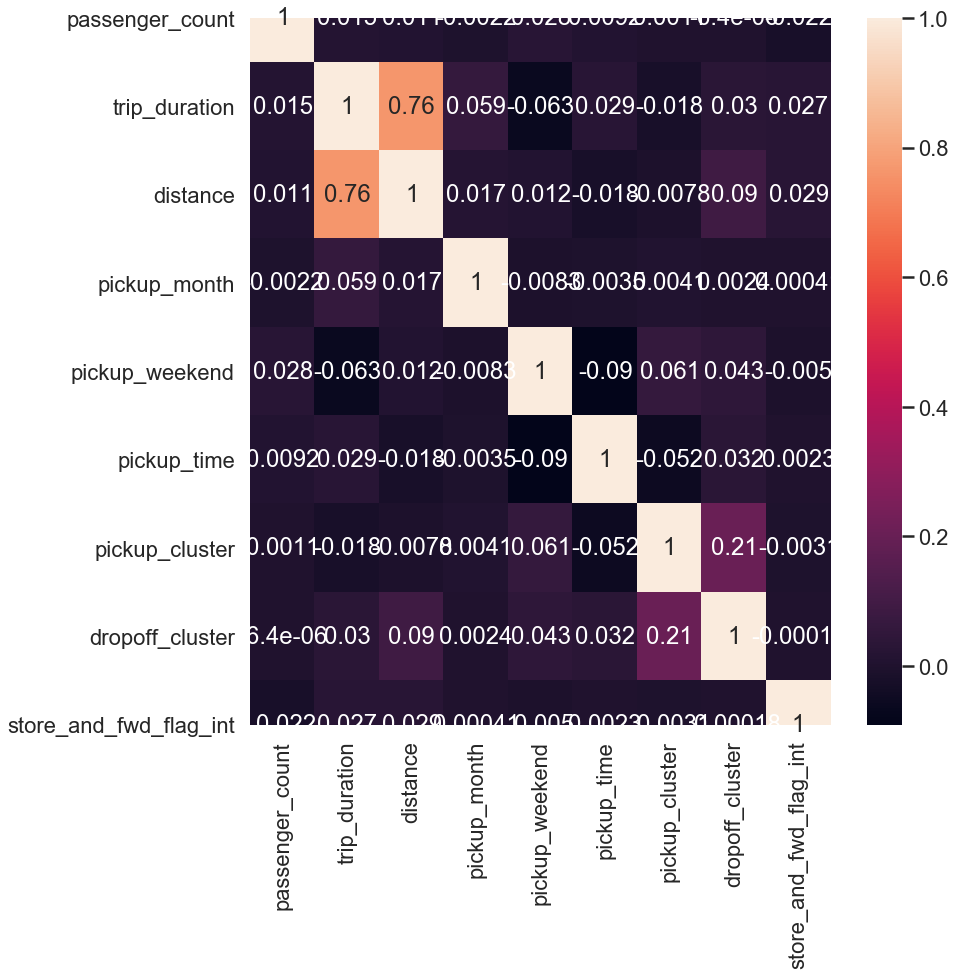

In [304]:
'''
Based on the correlationship table most significant predictor which determines
trip duration is the distance which makes sense as the distance increase the trip duration
increases

Since all the parameters are greater than 0.01 which is greate than 1 % I have included them significant ones

'''
plt.figure(figsize=(13,13))
sns.heatmap(df_train_new4.corr(),xticklabels=df_train_new4.corr().columns,yticklabels=df_train_new4.corr().columns,annot=True)

# Step 8: Split the training data  into train and validation data set

In [305]:
'''

Split Train data set into two parts 

1. Train 75%
2. Validation 25%

This will help us to know if we overfit the data set while training the values

'''
from sklearn.model_selection import train_test_split

Y = df_train_new4["trip_duration"]
X = df_train_new4.drop(["trip_duration"],axis = 1)
X_train,X_valid,Y_train,Y_valid = train_test_split(X,Y,test_size = 0.24,shuffle=False)

# Step 9: Build Model using standard alogrithms



## First lets assume that the model is linear and test our data set with

### 1. Linear regression 

if the model is not linear we can test two famous algorithm

### 2. Bagging - Randomforest regressor
### 3. Boosting - GraidentBoost regressor



## Linear Regression 

In [306]:
# Using skilearn import linear regression algorithms and predict the trip duration

from sklearn import datasets, linear_model
model_linear = linear_model.LinearRegression()
model_linear.fit(X_train, Y_train)
Y_pred = model_linear.predict(X_train)

In [307]:
# Coefficent will give you most imporant features - as you can see 2nd column distance is most important

model_linear.intercept_,model_linear.coef_

(323.7016316104981,
 array([ 3.99919314e+00,  1.28449662e+02,  1.81905882e+01, -9.80293565e+01,
         1.12018939e-03,  4.03680687e-01, -8.43285099e+00,  3.58309338e+01]))

In [309]:
# RMSLE compared to RMSE and MSE - Function is created to calculate the error 

def rmsle(y, y0):
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))

rmsle(Y_train, Y_pred)

0.5577621625934069

In [310]:
# Predict the validation data set trip duration

Y_pred_linear_valid=model_linear.predict(X_valid)
rmsle(Y_valid, Y_pred_linear_valid)

0.5573382789636718

In [311]:
# Based on above result we can conclude the model is not overfit . There are some assumption which
# regression model assumes let us understand that

# Step 10: Validate the assumption Are any model assumptions violated?


Linear model here are some assumption:

1. have mean zero; otherwise the forecasts will be systematically biased
2. statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data).
3. homoscedasticity (constant variance) of the errors.
4. normality of the error distribution.

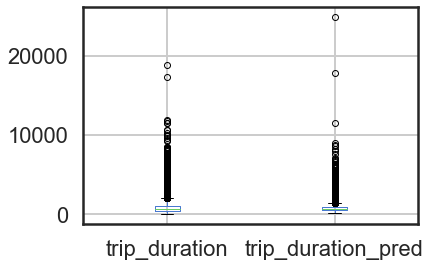

In [312]:
# From the below box plot the mean of the predicited and expected value remains almost same
# Means almost the same as seen in the box plot

import seaborn as sns

result = pd.concat([Y_valid,pd.Series(Y_pred_linear_valid, name='trip_duration_pred')], axis=1, sort=False)
ax = result.boxplot(column=['trip_duration','trip_duration_pred'],return_type='axes')

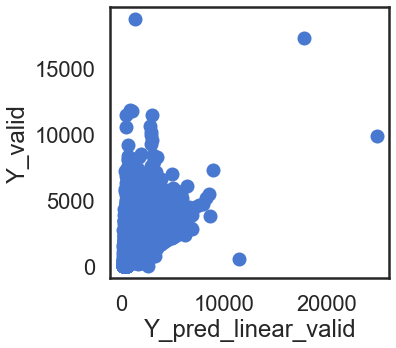

In [313]:
# homoscedasticity (constant variance) of the errors.
# As you can seen the scatter plot there is no constant variance of the errors 

residual = Y_valid - Y_pred_linear_valid
fig, ax = plt.subplots(figsize=(5,5))
plt.xlabel('Y_pred_linear_valid')
plt.ylabel('Y_valid')
ax.scatter(Y_pred_linear_valid,Y_valid)

0.851174456385113

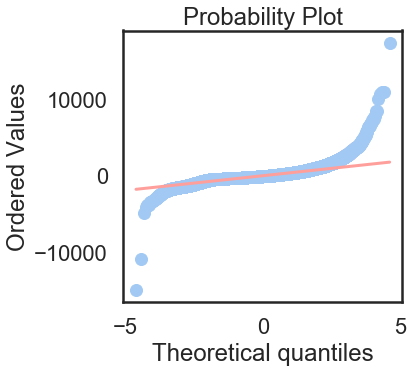

In [314]:
# normality of the error distribution.
# As you can see the residual are not normal distributed Based this assumption it is proven that 
# data is not linear

import scipy as sp
fig, ax = plt.subplots(figsize=(5,5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

## RandomForestRegression 

In [315]:
# Lets try to use bagging method - Random forest uses decision tree to calculate the target value

from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor()
model_random.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [316]:
# Let see how does randomforest predict train values

Y_pred_rand=model_random.predict(X_train)
rmsle(Y_train, Y_pred_rand)

0.23460885535600284

In [317]:
# calculate the validation data set 

Y_pred_rand_valid=model_random.predict(X_valid)
rmsle(Y_valid, Y_pred_rand_valid)

0.4679375754407687

# Clear case of over fitting the problem 
## As you can see Train RMSLE value is 0.23 and validation RMSLE value is 0.46 

# Step 11:  Hyper parameter tunning to over come overfit

In [318]:
'''
Tuning the hyper parameters for better performance
estimator ,leaf depth are some of the parameter are tuned

'''
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 20, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [319]:
'''
Runing all the combination using RandomsearchCV to get the best result for hyper parameters
Note : This will take about 1 min to run
'''
from sklearn.model_selection import RandomizedSearchCV
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,Y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.1min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [320]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [321]:
Y_pred_rand_valid=rf_random.predict(X_valid)

In [322]:
Y_pred_rand_train=rf_random.predict(X_train)
rmsle(Y_train, Y_pred_rand_train)

0.4337346907120056

In [323]:
rmsle(Y_valid, Y_pred_rand_valid)

0.43889576769888544

## As you can see after hyper parameter tuning the both train and validation RMSLE value tunned to 0.43
## To explain the evaluation better I used sample data set to plot the graph

In [324]:
# taking sample 20 rows to show the overfit 

X_valid_plot=X_train[:20] 
Y_valid_plot=Y_train[:20] 

In [325]:
Y_valid_best=rf_random.predict(X_valid_plot)
Y_valid_default=model_random.predict(X_valid_plot)

No handles with labels found to put in legend.


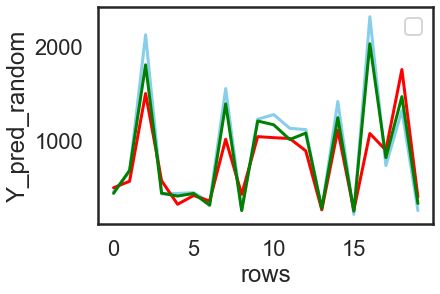

In [326]:
plt.plot(X_valid_plot.index, Y_valid_plot,color='skyblue')
plt.plot(X_valid_plot.index, Y_valid_best,color='red')
plt.plot(X_valid_plot.index, Y_valid_default,color='green')
plt.xlabel('rows')
plt.ylabel('Y_pred_random')
plt.legend()

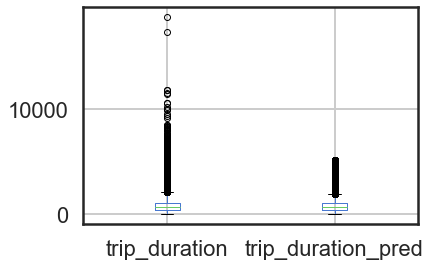

In [327]:
# lets calulate the assumption made initially

import seaborn as sns

result = pd.concat([Y_valid,pd.Series(Y_pred_rand_valid, name='trip_duration_pred')], axis=1, sort=False)
ax = result.boxplot(column=['trip_duration','trip_duration_pred'],return_type='axes')

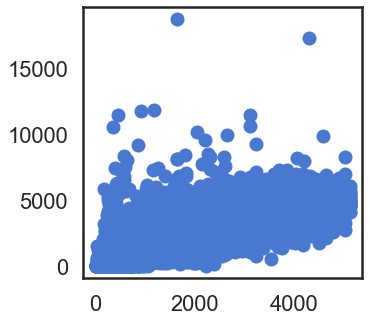

In [328]:
# Check homoscedasticity 

residual = Y_valid - Y_pred_rand_valid
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Y_pred_rand_valid,Y_valid)

0.828206140887939

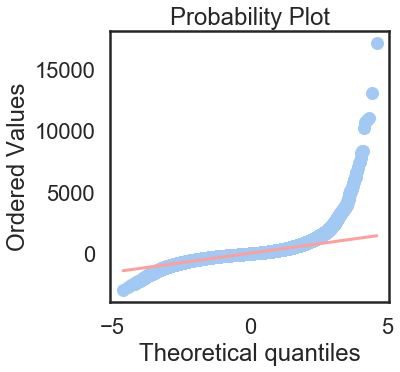

In [329]:
# plot Q-Q to understand normal distribution

import scipy as sp
fig, ax = plt.subplots(figsize=(5,5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

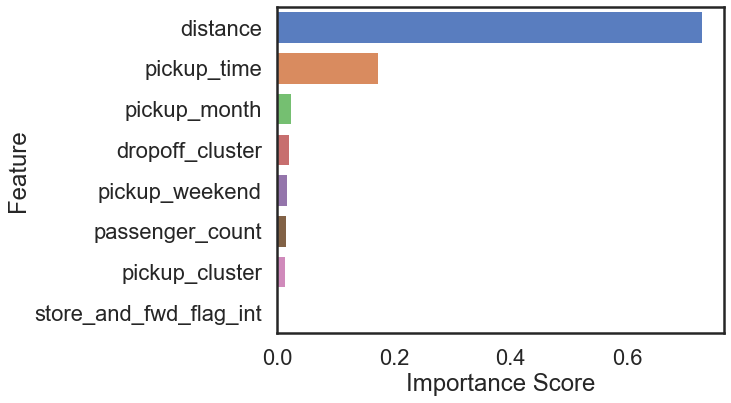

In [330]:
## calculate the feature selection which should match the correlation and coffecient values

##

feat_imps = pd.DataFrame(model_random.feature_importances_, index = X_train.columns,
                                    columns=['Importance score']).sort_values('Importance score',ascending=False)
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature","Importance Score"]
plt.figure(figsize = (8,6))
sns.barplot(x = "Importance Score",y = "Feature",data = feat_imps,orient = "h")

## GradientBoost Regressor 

In [331]:
# Using skilearn build package to import boosting method

from sklearn.ensemble import GradientBoostingRegressor
model_grad = GradientBoostingRegressor()
model_grad.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [332]:
# predict the train data set 

Y_pred_grad=model_grad.predict(X_train)
rmsle(Y_train, Y_pred_grad)

0.456307297447758

In [333]:
# predict the validation data set 

Y_pred_grad_valid=model_grad.predict(X_valid)
rmsle(Y_valid, Y_pred_grad_valid )

0.45513785996828243

In [336]:
# Hyper parameter tunning using gridsearchcv

from sklearn.model_selection import GridSearchCV
n_estimators = [10, 20]
max_depth = [1,3]
min_samples_split = [2,5]
min_samples_leaf = [1,5] 

parameters = dict(n_estimators = n_estimators, 
                  max_depth = max_depth,
                  min_samples_split = min_samples_split,
                  min_samples_leaf = min_samples_leaf)

grid_random = GridSearchCV(model_grad,
                           parameters,
                           cv = 2,
                           verbose = 1,
                           n_jobs = -1)

In [337]:
# Fit the random search model
grid_random.fit(X_train,Y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  2.5min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [338]:
Y_pred_grad=grid_random.predict(X_train)
rmsle(Y_train, Y_pred_grad)

0.5233486070505683

In [339]:
Y_pred_grad_valid=grid_random.predict(X_valid)
rmsle(Y_valid, Y_pred_grad_valid )

0.5223505515214422

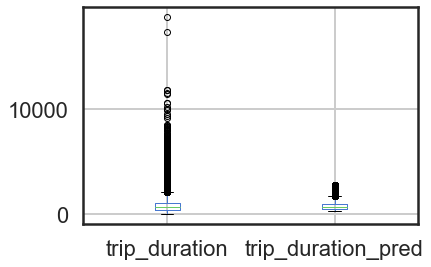

In [340]:
# lets calulate the assumption made initially

result = pd.concat([Y_valid,pd.Series(Y_pred_grad_valid, name='trip_duration_pred')], axis=1, sort=False)
ax = result.boxplot(column=['trip_duration','trip_duration_pred'],return_type='axes')

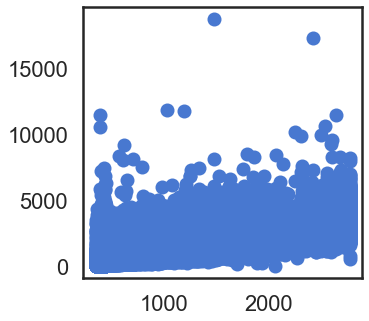

In [341]:
# Check homoscedasticity 
residual = Y_valid - Y_pred_grad_valid
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Y_pred_grad_valid,Y_valid)

0.7982745732708141

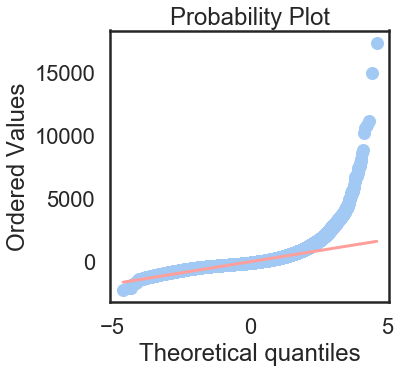

In [342]:
# plot Q-Q to understand normal distribution

import scipy as sp
fig, ax = plt.subplots(figsize=(5,5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

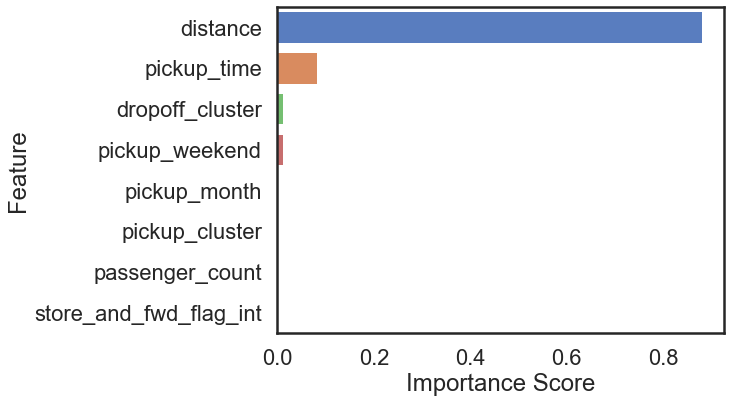

In [390]:
## calculate the feature selection which should match the correlation and coffecient values
 
feat_imps = pd.DataFrame(model_grad.feature_importances_, index = X_train.columns,
                                    columns=['Importance score']).sort_values('Importance score',ascending=False)
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature","Importance Score"]
plt.figure(figsize = (8,6))
sns.barplot(x = "Importance Score",y = "Feature",data = feat_imps,orient = "h")

# Step 12:  Try to Regularize to reduce the coffecient weights

In [345]:
'''
To reglarize there are two lasso and regression objective is to constraining the coffecient and shruk them to 0

Ridge regression (or "L2 regularization") minimizes:$$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$

Lasso regression (or "L1 regularization") minimizes:$$\text{RSS} + \alpha \sum_{j=1}^p |\beta_j|$$

'''
    
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5, 1.0, 'Ridge Regression - Trip duration vs Predicted Trip duration: $Y_i$ vs $\\hat{y}_i$')

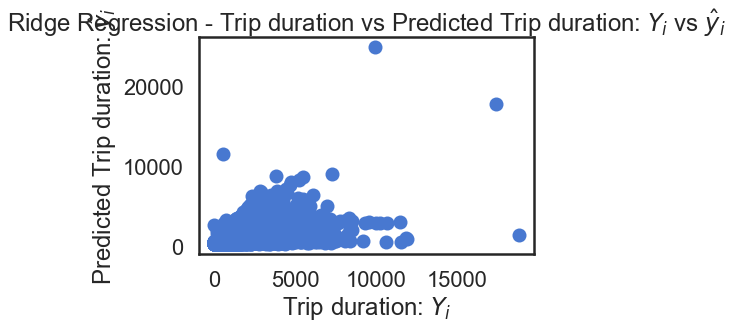

In [346]:
'''
Distrubution of y prediction and actual trip duration
'''
Y_pred_valid_reg = ridge.predict(X_valid)

plt.scatter(Y_valid, Y_pred_valid_reg)
plt.xlabel("Trip duration: $Y_i$")
plt.ylabel("Predicted Trip duration: $\hat{y}_i$")
plt.title("Ridge Regression - Trip duration vs Predicted Trip duration: $Y_i$ vs $\hat{y}_i$")

In [347]:
# Calulate the RMSLE value which is 0.5 which doesnt seems to overfit. Model is not overfit henc
# changing the alpha value shouldnot give stright line

rmsle(Y_valid, Y_pred_valid_reg )

0.5573382800112756

In [361]:
# Calculate the RMSLE value corresponding to the increae in alpha value

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.logspace(0,1,10)
t_rmse = np.array([])
cv_rmse = np.array([])
train_err=[]
valid_err=[]

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)  
    ridge.fit(X_train,Y_train)
    y_pred = ridge.predict(X_train)
    train_err.append(rmsle(Y_train,y_pred))
    y_pred_valid = ridge.predict(X_valid)
    valid_err.append(rmsle(Y_valid,y_pred_valid))    

d={'Train_RMSE' : train_err, 'Valid_RMSE' : valid_err}

df = pd.DataFrame(d)
df.index = alpha
df

Ridge Regression
alpha	 RMSE_train	 RMSE_cv



,Train_RMSE,Valid_RMSE
1.000000,0.557762,0.557338
1.291550,0.557762,0.557338
1.668101,0.557762,0.557338
2.154435,0.557762,0.557338
2.782559,0.557762,0.557338
3.593814,0.557762,0.557338
4.641589,0.557762,0.557338
5.994843,0.557762,0.557338
7.742637,0.557762,0.557338
10.000000,0.557762,0.557338


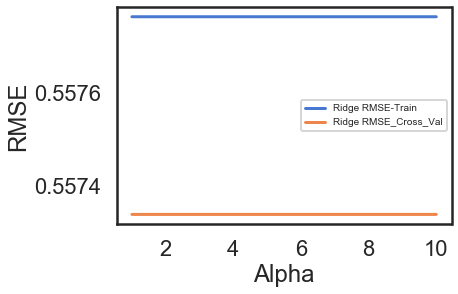

In [362]:
import pylab as pl
pl.plot(df.index, df.Train_RMSE, label='RMSE-Train')
pl.plot(df.index, df.Valid_RMSE, label='RMSE_Cross_Val')
pl.legend( ('Ridge RMSE-Train', 'Ridge RMSE_Cross_Val'), prop={'size': 10} )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

In [363]:
# Similar principle to apply for L1 compression 

print('lasso Regression')
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.linspace(0,1,10)
t_rmse = np.array([])
cv_rmse = np.array([])
train_err=[]
valid_err=[]

for a in alpha:
    lasso = Lasso(fit_intercept=True, alpha=a)  
    lasso.fit(X_train,Y_train)
    y_pred = lasso.predict(X_train)
    train_err.append(rmsle(Y_train,y_pred))
    y_pred_valid = lasso.predict(X_valid)
    valid_err.append(rmsle(Y_valid,y_pred_valid))    

d={'Train_RMSE' : train_err, 'Valid_RMSE' : valid_err}
df_lasso = pd.DataFrame(d)
df_lasso

lasso Regression
alpha	 RMSE_train	 RMSE_cv



,Train_RMSE,Valid_RMSE
0,0.557762,0.557338
1,0.557744,0.557331
2,0.557734,0.557331
3,0.557741,0.557336
4,0.557749,0.557341
5,0.557757,0.557346
6,0.557765,0.557352
7,0.557773,0.557358
8,0.557782,0.557364
9,0.557791,0.557371


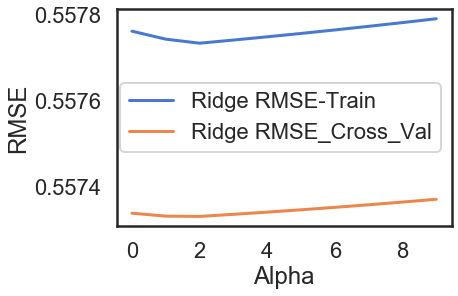

In [364]:
# Already the model is underfit there is no point in shrinking the model using regularization method
import pylab as pl
pl.plot(df_lasso.index, df_lasso.Train_RMSE, label='RMSE-Train')
pl.plot(df_lasso.index, df_lasso.Valid_RMSE, label='RMSE_Cross_Val')
pl.legend( ('Ridge RMSE-Train', 'Ridge RMSE_Cross_Val'),prop={'size': 10} )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

[('Random', 0.43889576769888544), ('Graident', 0.5223505515214422), ('Linear', 0.5573382789636718)]


Text(0.5, 0, 'Algorithms')

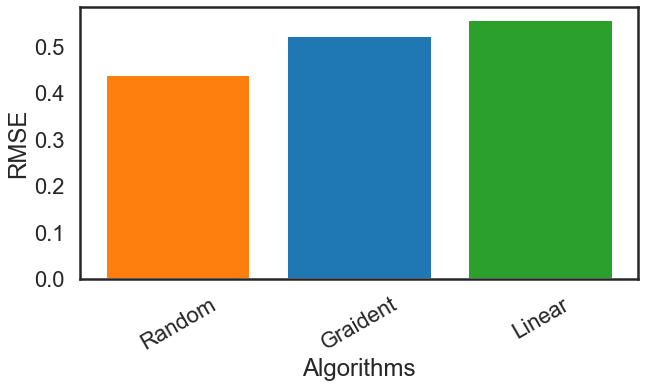

In [368]:
# Calculate the best algorithms

plt.figure(figsize=(10, 5))

accuracy_dict = {
    'Linear' : rmsle(Y_valid,Y_pred_linear_valid),
    'Random' : rmsle(Y_valid,Y_pred_rand_valid),
    'Graident': rmsle(Y_valid,Y_pred_grad_valid)

}


sorted_x = sorted(accuracy_dict.items(), key=lambda kv: kv[1])
print(sorted_x)
import collections
sorted_dict = collections.OrderedDict(sorted_x)
# plt.bar(m['label'], acc_score)
plt.bar(range(len(sorted_dict)), list(sorted_dict.values()), align='center', color=['tab:orange', 'tab:blue','tab:green','tab:red', 'tab:cyan'])
plt.xticks(range(len(sorted_dict)), list(sorted_dict.keys()))
plt.xticks(rotation=30)
pl.ylabel('RMSE')
pl.xlabel('Algorithms')

# Step 13: Implement the feature selection and Randomforest alogrithm to predict the test result

In [378]:
# Load the Test data sets

my_path = %pwd
print(my_path)
df_test = pd.read_csv(f'{my_path}/test.csv')
print (df_test.shape)
df_test.head(13)

/Users/shruthiarun/Desktop/shreyasassginment/Spring2020/advance_data_science/assignment-1
(625134, 9)


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
5,id0668992,1,2016-06-30 23:59:30,1,-73.991302,40.749798,-73.980515,40.786549,N
6,id1765014,1,2016-06-30 23:59:15,1,-73.978310,40.741550,-73.952072,40.717003,N
7,id0898117,1,2016-06-30 23:59:09,2,-74.012711,40.701527,-73.986481,40.719509,N
8,id3905224,2,2016-06-30 23:58:55,2,-73.992332,40.730511,-73.875618,40.875214,N
9,id1543102,2,2016-06-30 23:58:46,1,-73.993179,40.748760,-73.979309,40.761311,N


In [379]:
# Check for null values

null_vals = df_test.isnull().sum()/len(df_test)*100
print (null_vals)
null_vals = pd.DataFrame(null_vals)

id                    0.0
vendor_id             0.0
pickup_datetime       0.0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag    0.0
dtype: float64


In [380]:
# Feature selections

df_test_new=df_test.copy()

df_test_new['distance'] = df_test_new.apply(lambda r: haversine.haversine((r['pickup_latitude'],r['pickup_longitude']),(r['dropoff_latitude'], r['dropoff_longitude'])), axis=1)

df_test_new["pickup_datetime"]= pd.to_datetime(df_test_new["pickup_datetime"]) 
df_test_new['pickup_month'] = df_test_new['pickup_datetime'].dt.month
df_test_new['pickup_day_of_week'] = df_test_new['pickup_datetime'].dt.weekday
df_test_new['pickup_weekend'] = np.where((df_test_new['pickup_datetime'].dt.dayofweek) < 5,0,1)
df_test_new['pickup_time'] = (df_test_new['pickup_datetime']- df_test_new['pickup_datetime'].dt.floor('D')).dt.total_seconds()



In [381]:
# Create pickup and drop off cluster

kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_test_new_pick = df_test_new[['pickup_longitude','pickup_latitude']]
df_test_new_dropoff = df_test_new[['dropoff_longitude','dropoff_latitude']]
kmeans.fit(df_test_new_pick)
cluster = kmeans.labels_
df_test_new['pickup_cluster'] = cluster.tolist()
df_test_new['dropoff_cluster'] = kmeans.predict(df_test_new_dropoff)

In [382]:
#dropping unwanted tables and rows 

df_test_new.drop("id",axis = 1,inplace=True)
df_test_new.drop("pickup_datetime",axis = 1,inplace=True)
df_test_new.store_and_fwd_flag[df_test_new.store_and_fwd_flag == 'N'] = 0
df_test_new.store_and_fwd_flag[df_test_new.store_and_fwd_flag == 'Y'] = 1
df_test_new['store_and_fwd_flag_int']=df_test_new['store_and_fwd_flag'].astype('int')
df_test_new.drop("store_and_fwd_flag",axis = 1,inplace=True)

In [383]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 14 columns):
vendor_id                 625134 non-null int64
passenger_count           625134 non-null int64
pickup_longitude          625134 non-null float64
pickup_latitude           625134 non-null float64
dropoff_longitude         625134 non-null float64
dropoff_latitude          625134 non-null float64
distance                  625134 non-null float64
pickup_month              625134 non-null int64
pickup_day_of_week        625134 non-null int64
pickup_weekend            625134 non-null int64
pickup_time               625134 non-null float64
pickup_cluster            625134 non-null int64
dropoff_cluster           625134 non-null int32
store_and_fwd_flag_int    625134 non-null int64
dtypes: float64(6), int32(1), int64(7)
memory usage: 64.4 MB


In [384]:
# Dropping columns based on collinearity and VIF score

df_test_new.drop(["vendor_id"],axis = 1,inplace=True)
df_test_new.drop(["dropoff_longitude","dropoff_latitude","pickup_longitude","pickup_latitude","pickup_day_of_week"],axis = 1,inplace=True)

In [385]:
# New model 

df_test_new

,passenger_count,distance,pickup_month,pickup_weekend,pickup_time,pickup_cluster,dropoff_cluster,store_and_fwd_flag_int
0,1,2.746430,6,0,86398.0,5,0,0
1,1,2.759243,6,0,86393.0,5,5,0
2,1,1.306157,6,0,86387.0,5,5,0
3,1,5.269095,6,0,86381.0,4,5,0
4,1,0.960843,6,0,86373.0,0,0,0
...,...,...,...,...,...,...,...,...
625129,1,0.967439,1,0,172.0,5,5,0
625130,1,6.196352,1,0,112.0,5,4,0
625131,2,8.153730,1,0,84.0,0,3,0
625132,1,20.380776,1,0,28.0,5,3,0


In [389]:
# Using Tuned Randomforest model predict the test duration
# Acutal test duration is not present in kaggle to compare the RMSLE value

Y_test_pred=rf_random.predict(df_test_new)
Y_test_pred

array([ 721.7431264 ,  603.21495295,  270.46677385, ..., 1464.87296506,
       1898.3201415 , 1074.94663388])

# Conclusion

* The research problem was finding the trip duration a taxi takes for given pick-up and drop-off locations. Trip duration was predicted using the Randomforest algorithm. 
* k-means was also applied for feature engineering and better performance in terms of
both accuracy and computation times. 
* Taxi giants such as UBER and LYFT can use the same data for analyzing the trends that vary throughout the day in the city. This not only helps in better transport analysis but also helps the concerned authorities in planning traffic control and monitoring

# Reference 

* https://github.com/nikbearbrown/INFO_7390/tree/master/Week_2
* https://www.kaggle.com/gaborfodor/from-eda-to-the-top-lb-0-367/data
* https://www.kaggle.com/opanichev/lightgbm-regressor/code
* https://www.kaggle.com/poonaml/last-cab-to-new-york-animated-heatmap-trips-folium
* https://www.kaggle.com/maheshdadhich/strength-of-visualization-python-visuals-tutorial

# License 

Copyright 2020 Shreyas Kambla

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Question:

* Is the relationship significant? -  vendor_id pvalue > 0.05
* Are any model assumptions violated? - homoscedasticity & normal error distribution voilated
* Is there any multi-collinearity in the model? - Yes pickup lat/long and drop lat/long
* In the multivariate models are predictor variables independent of all the other predictor variables? - VIF score all the score above 5 is removed
* In in multivariate models rank the most significant predictor variables and exclude insignificant ones - distance is most significant

# from the model.

* Does the model make sense? - Yes as distance increase the trip duration increase + coefficent
* Does regularization help? - Nope already model is not overfit by shrinking the weights there  was no huge change RMSLE 

* Which independent variables are significant? - distance and pickuptime

* Which hyperparameters are important? - For Randomforest max_depth and min_samples_leaf is more important 